# Credit Card Fraud Analysis

The dataset have 31 columns consist

1. Time -> the time elapsed in second between each transaction and the first transaction in the dataset.

2. Columns V1-V28 -> These are the result of a PCA dimensionality reduction. Their meaning has been made obscure intentionally due to privacy reason.

3. Amount -> Total Transaction at certain time.

4. Class -> Type of transaction (1 for Fraud, 0 for legit).

## Import data and library

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import warnings
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Credit Fraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [3]:
# Turn the time into the hour
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))

tmp = df.groupby(['Hour','Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour', 'Class', 'Min', 'Max', 'Transaction', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

,Hour,Class,Min,Max,Transaction,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


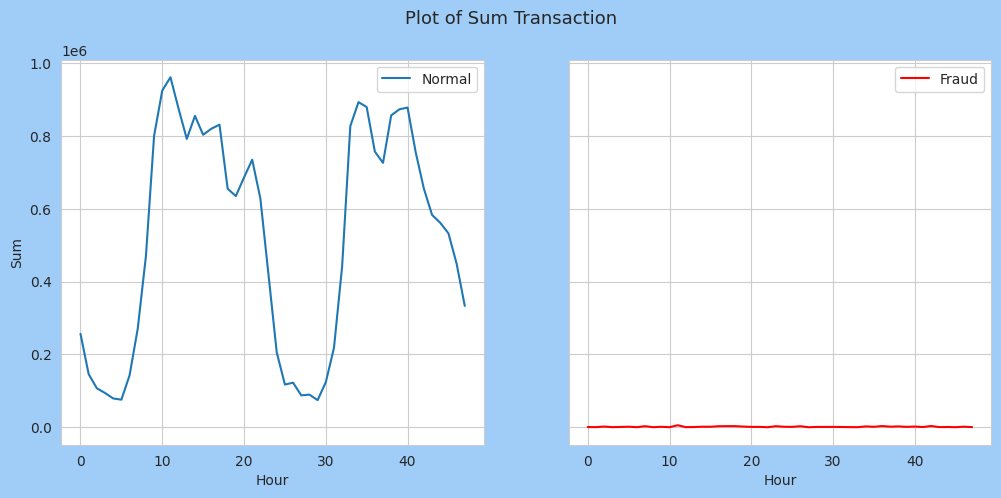

In [4]:
# plotting
def line_plotting(data = df_tmp, x_axis=None, y_axis=None):
  fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5), sharey = True)

  sns.lineplot(data = data.loc[data.Class == 0], x = x_axis, y = y_axis, label = 'Normal', ax = axs[0])
  sns.lineplot(data = data.loc[data.Class == 1], x = x_axis, y = y_axis, label = 'Fraud', ax = axs[1], color = 'red')
  plt.suptitle('Plot of {} Transaction'.format(y_axis), fontsize = 13)
  fig.set_facecolor('#a0cdf8')
  return plt.show()

line_plotting(x_axis = 'Hour', y_axis = 'Sum')

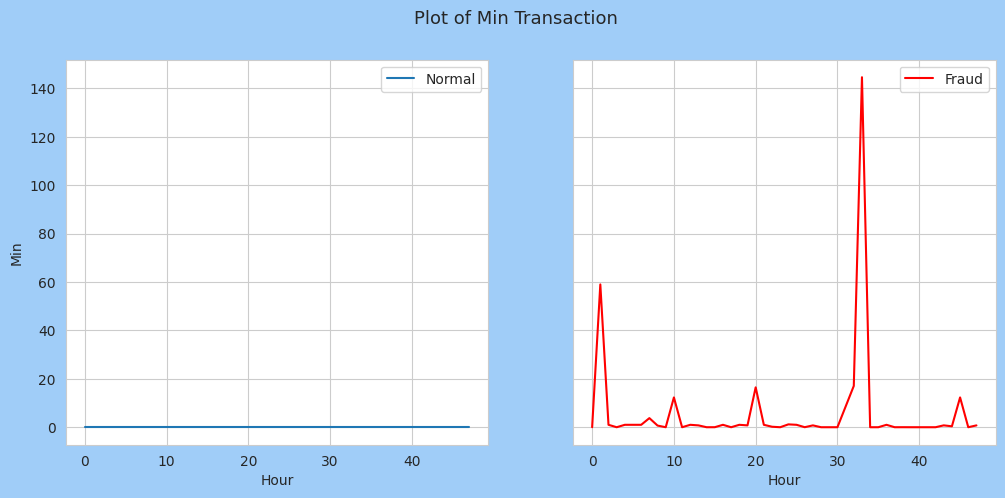

In [5]:
line_plotting(x_axis = 'Hour', y_axis = 'Min')

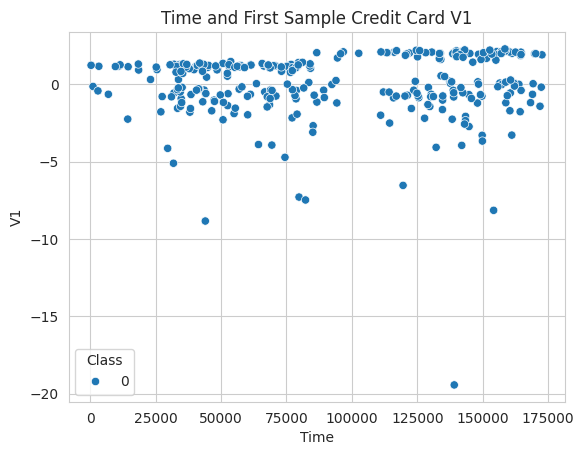

In [6]:
# Plot Time and V1 hue Class
sns.scatterplot(data=df.sample(300, random_state = 100), x='Time', y='V1', hue='Class')
plt.title('Time and First Sample Credit Card V1')
plt.ylabel('V1')
plt.xlabel('Time')
#plt.savefig('Scatterplot of V1 sample')
#files.download('Scatterplot of V1 sample.png')
plt.show()

In [7]:
len(df[df.Class == 1])*100/len(df)

0.1727485630620034

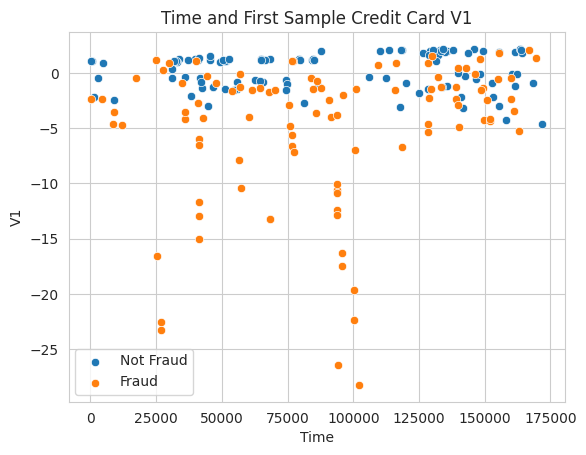

In [8]:
# Scatterplot with seperate class
sns.scatterplot(data = df[df.Class == 0].sample(100), x = 'Time', y = 'V1', label = 'Not Fraud')
sns.scatterplot(data = df[df.Class == 1].sample(100), x = 'Time', y = 'V1', label = 'Fraud')
plt.title('Time and First Sample Credit Card V1')
plt.ylabel('V1')
plt.xlabel('Time')
#plt.savefig('Scatterplot of V1 sample')
#files.download('Scatterplot of V1 sample.png')
plt.show()

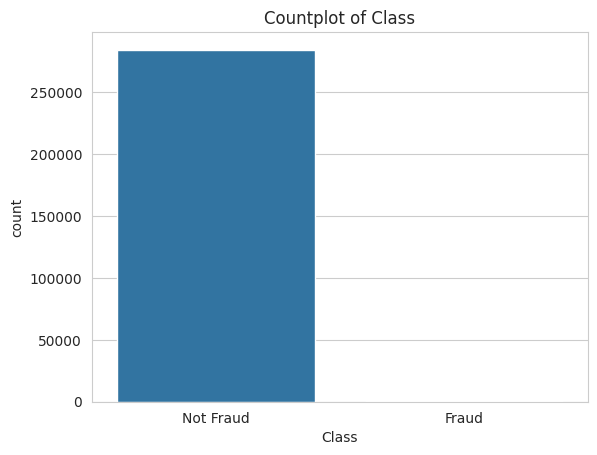

In [9]:
# Countplot of Class
sns.countplot(data=df, x='Class')
plt.title('Countplot of Class')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
#plt.savefig('Countplot of CC Class.png')
#files.download('Countplot of CC Class.png')
plt.show()

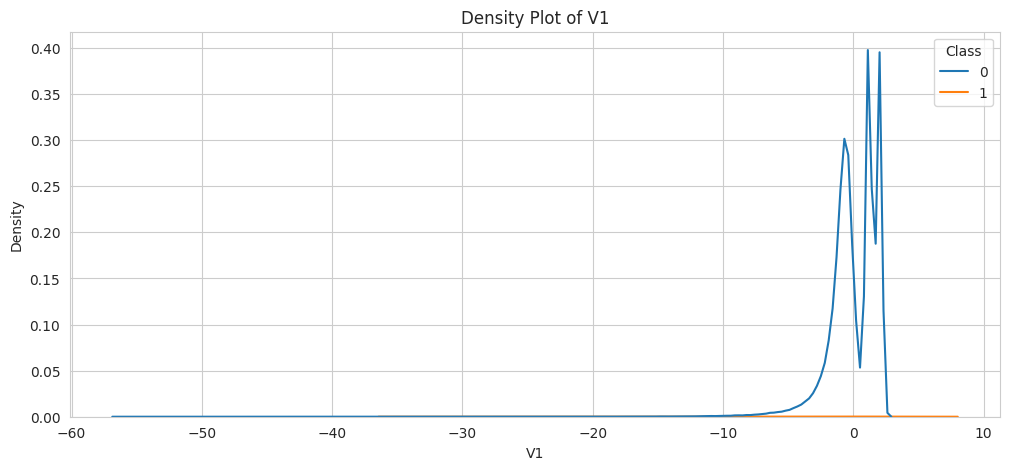

In [10]:
# Density Plot of V1
fig = plt.subplots(figsize = (12,5))
sns.kdeplot(data=df, x='V1', hue='Class')
plt.title('Density Plot of V1')
plt.show()

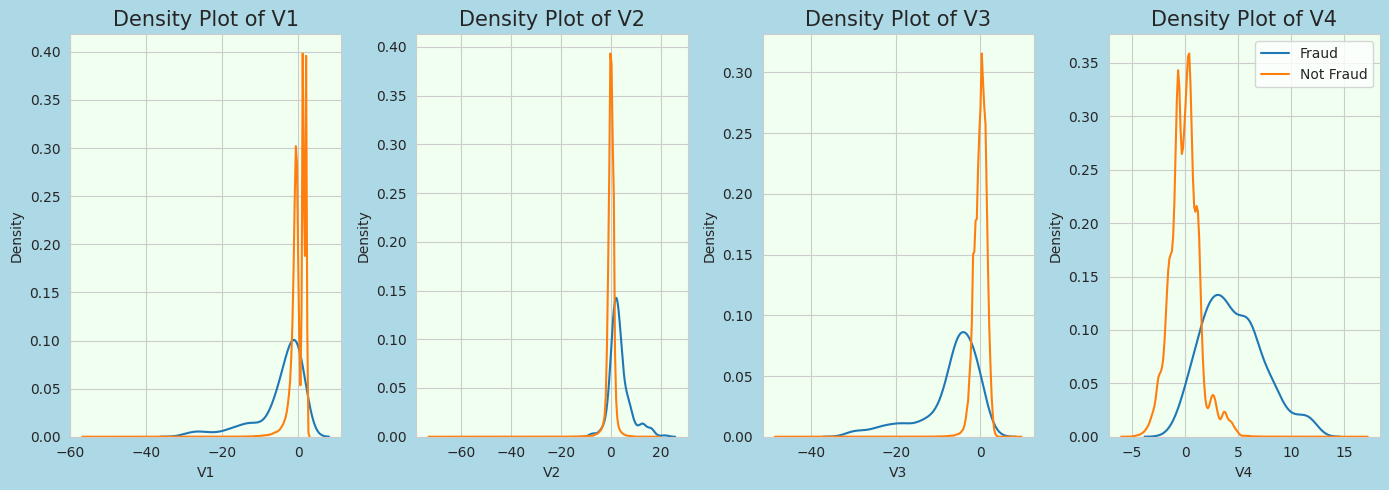

In [11]:
# Density plot of V1 - V4 with Separation of Class
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (14,5))

for i, ax in enumerate(axs):
  sns.kdeplot(data = df[df.Class == 1]['V{}'.format(i+1)], ax = ax, label = 'Fraud')
  sns.kdeplot(data = df[df.Class == 0]['V{}'.format(i+1)], ax = ax, label = 'Not Fraud')
  ax.set_title('Density Plot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.legend()
plt.show()

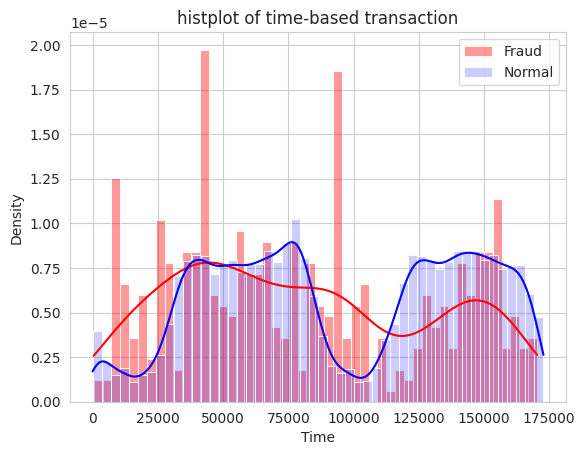

In [12]:
# Line plot of transaction each time
sns.histplot(data = df[df.Class == 1]['Time'], bins = 50, kde = True, color = 'red', stat = 'density', alpha = 0.4, label = 'Fraud')
sns.histplot(data = df[df.Class == 0]['Time'], bins = 50, kde = True, color = 'blue', stat = 'density', alpha = 0.2, label = 'Normal')
plt.title('histplot of time-based transaction')
plt.legend()
plt.show()

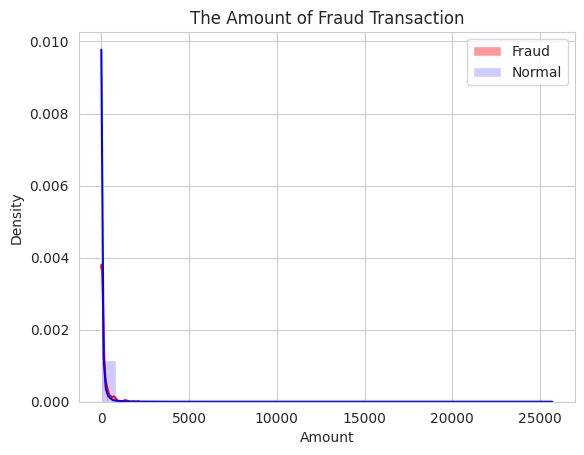

In [13]:
# Fraud-Not Fraud transaction after
sns.set_style('whitegrid')
sns.histplot(data = df[df.Class == 1]['Amount'], bins = 30, kde = True, color = 'red', stat = 'density', alpha = 0.4, label = 'Fraud')
sns.histplot(data = df[df.Class == 0]['Amount'], bins = 30, kde = True, color = 'blue', stat = 'density', alpha = 0.2, label = 'Normal')
plt.title('The Amount of Fraud Transaction')
plt.legend()
#plt.savefig('The Amount of Fraud Transaction.png')
#files.download('The Amount of Fraud Transaction.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

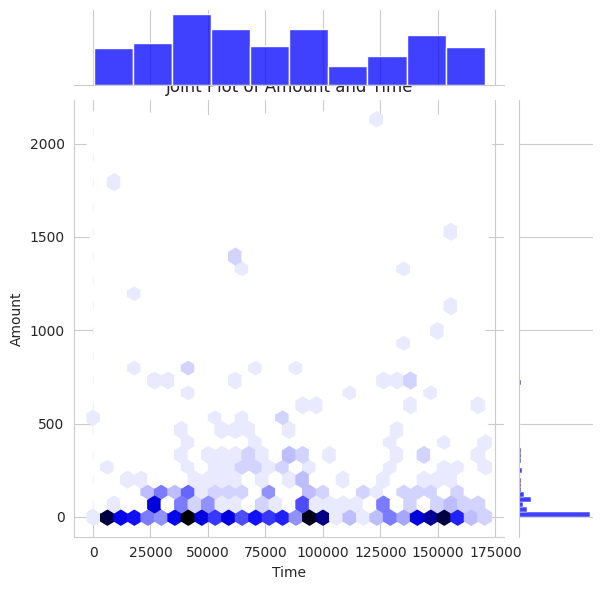

In [14]:
# plot amount and time in barplot
fig = plt.figure(figsize = (12, 6))
sns.jointplot(x = df[df.Class == 1]['Time'], y = df[df.Class == 1]['Amount'], kind = 'hex', color = 'blue')
plt.title('Joint Plot of Amount and Time')
fig.tight_layout()
plt.show()

## Feature Engineering

### Find Data Duplication and Create new data

In [15]:
# Find Duplicated Data
print('There are {} duplicated data of {} in total of Fraud transaction'.format(df[df.Class == 1].duplicated().sum(), df[df.Class == 1].shape[0]))
print('There are {} duplicated data of {} in total of Non-Fraud transaction'.format(df[df.Class == 0].duplicated().sum(), df[df.Class == 0].shape[0]))

There are 19 duplicated data of 492 in total of Fraud transaction
There are 1062 duplicated data of 284315 in total of Non-Fraud transaction


In [16]:
# drop duplicated data
df_new = df.drop_duplicates()
print('Before drop data duplication: {}'.format(df.shape[0]))
print('After drop data duplication: {}'.format(df_new.shape[0]))

Before drop data duplication: 284807
After drop data duplication: 283726


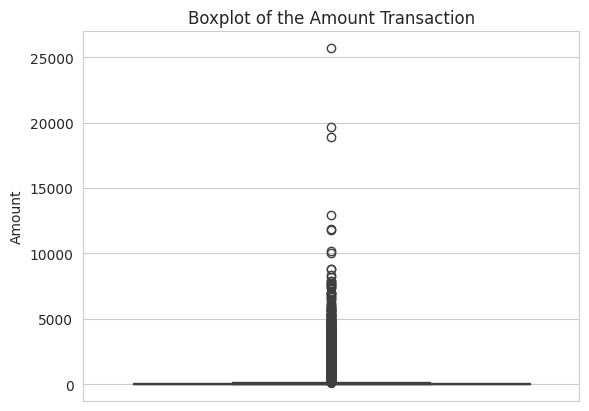

In [17]:
# Create Boxplot to Find Outlier
sns.boxplot(data = df_new['Amount'])
plt.title('Boxplot of the Amount Transaction')
#plt.savefig('Boxplot of the Amount Transaction.png')
#files.download('Boxplot of the Amount Transaction.png')
plt.show()

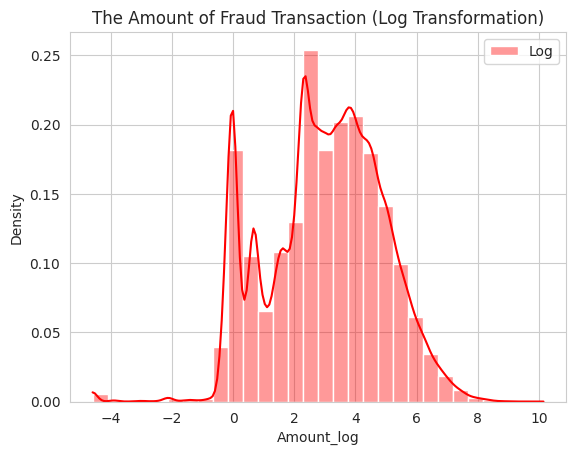

In [18]:
# Log transfomation and box cox for amount columns
from scipy import stats

df_new['Amount_log'] = np.log(df['Amount'])
#df['Amount_boxcox'], _ = stats.boxcox(df['Amount'])
sns.histplot(df_new['Amount_log'], bins = 30, kde = True, color = 'red', stat = 'density', alpha = 0.4, label = 'Log')
#sns.histplot(df['Amount_boxcox'], bins = 30, kde = True, color = 'blue', stat = 'density', alpha = 0.2, label = 'Boxcox')
plt.title('The Amount of Fraud Transaction (Log Transformation)')
plt.legend()
plt.show()

### Handle Null value

In [19]:
# Handling null value
print('The dataset have {} null data of {} in total of Fraud Transaction'.format(df_new[df_new.Class == 1].isnull().sum().sum(), df_new[df_new.Class == 1].shape[0]))
print('The dataset have {} null data of {} in total of Non-Fraud Transaction'.format(df_new[df_new.Class == 0].isnull().sum().sum(), df_new[df_new.Class == 0].shape[0]))

The dataset have 0 null data of 473 in total of Fraud Transaction
The dataset have 0 null data of 283253 in total of Non-Fraud Transaction


### Find Outlier in the Amount Column

### Check Outlier in V1-V28

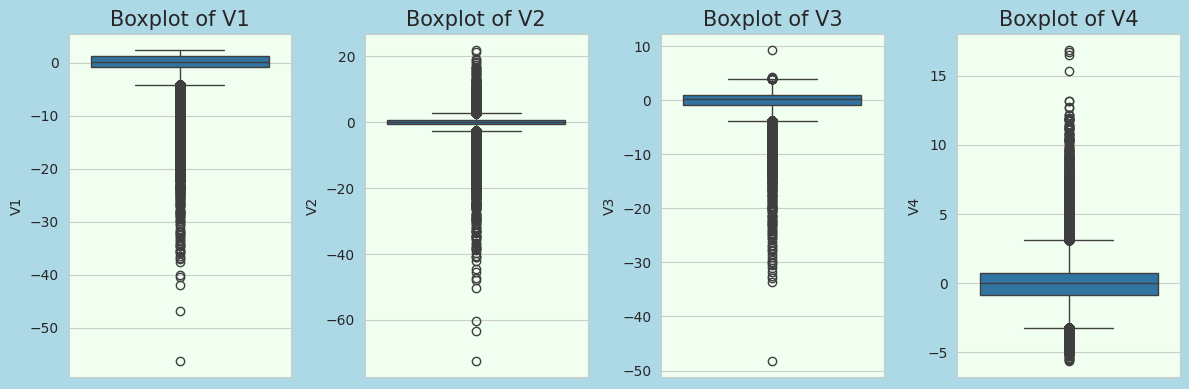

In [20]:
# V1 - V4 outlier
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i, ax in enumerate(axs):
  sns.boxplot(data = df_new['V{}'.format(i+1)], ax = ax)
  ax.set_title('Boxplot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
#plt.savefig('Boxplot of V1 V4.png', dpi = 300)
#files.download('Boxplot of V1 V4.png')
plt.show()

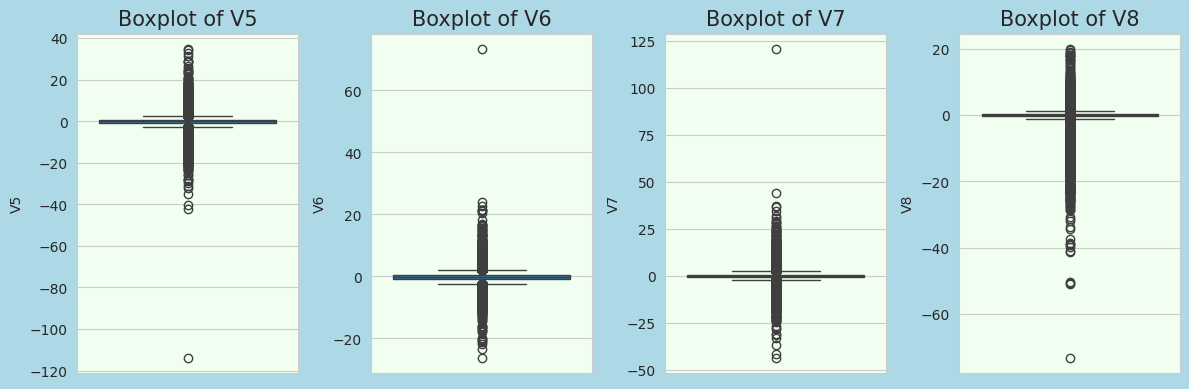

In [21]:
 #V5 - V8
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i in range(4):
  sns.boxplot(data = df_new['V{}'.format(i+5)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+5), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

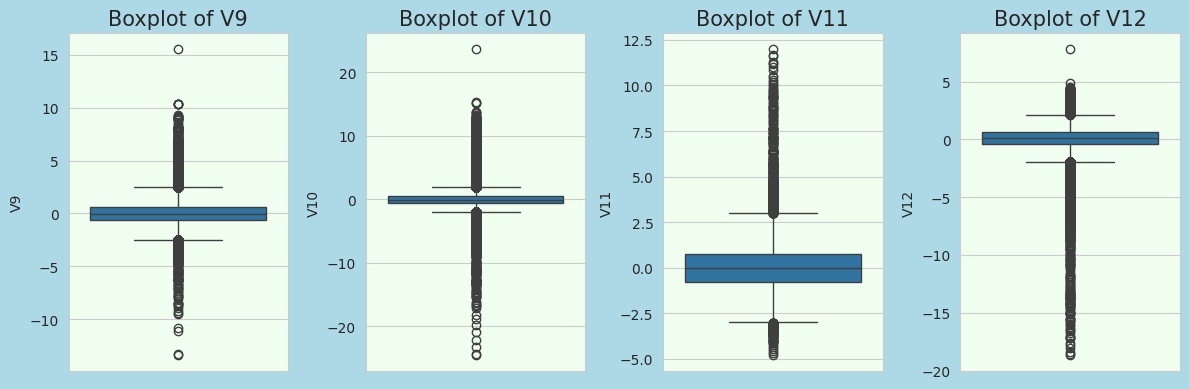

In [22]:
# V9 - V12
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i in range(4):
  sns.boxplot(data = df_new['V{}'.format(i+9)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+9), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

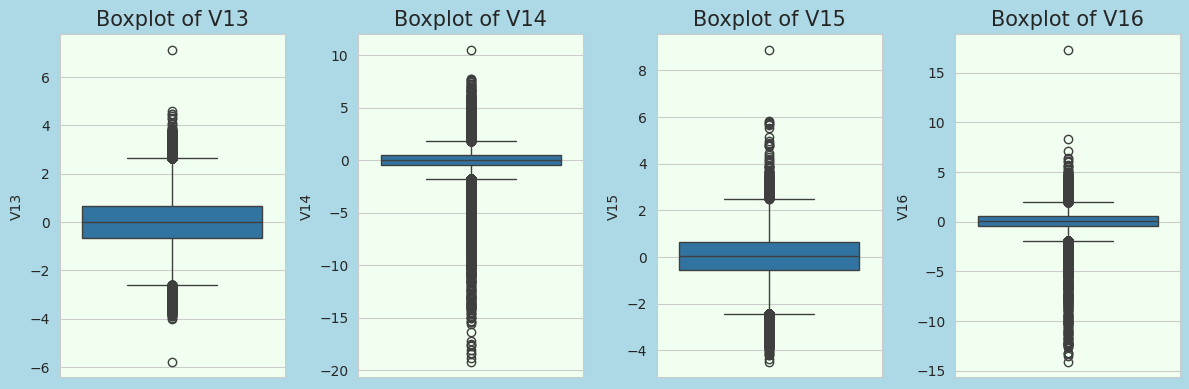

In [23]:
# V13 - V16
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i in range(4):
  sns.boxplot(data = df_new['V{}'.format(i+13)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+13), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

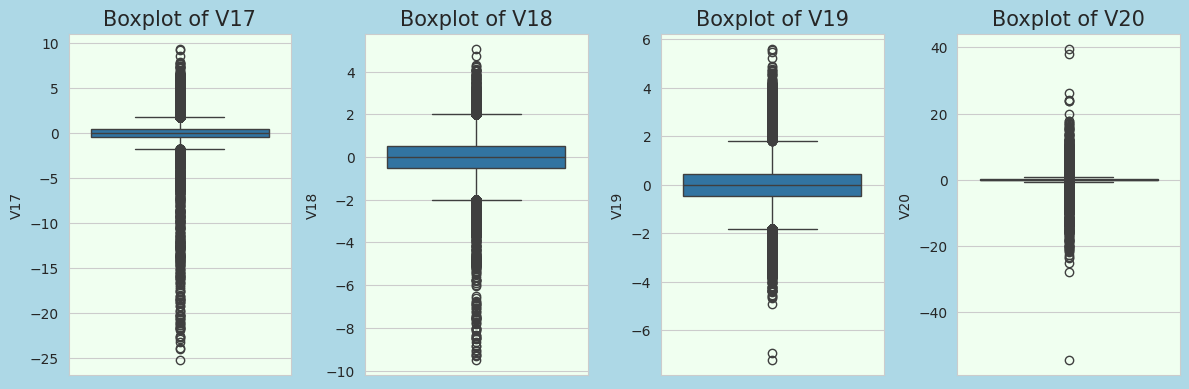

In [24]:
# V17 - V20
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i in range(4):
  sns.boxplot(data = df_new['V{}'.format(i+17)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+17), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

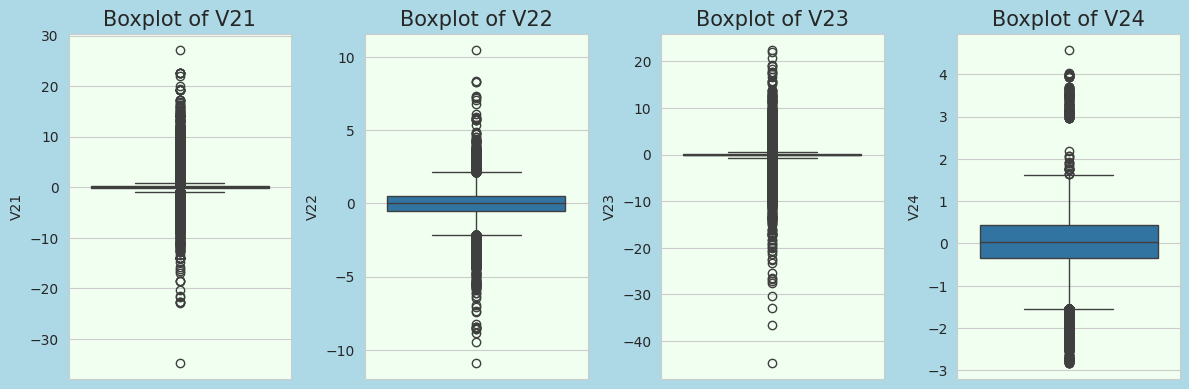

In [25]:
# V21 - V24
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i in range(4):
  sns.boxplot(data = df_new['V{}'.format(i+21)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+21), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

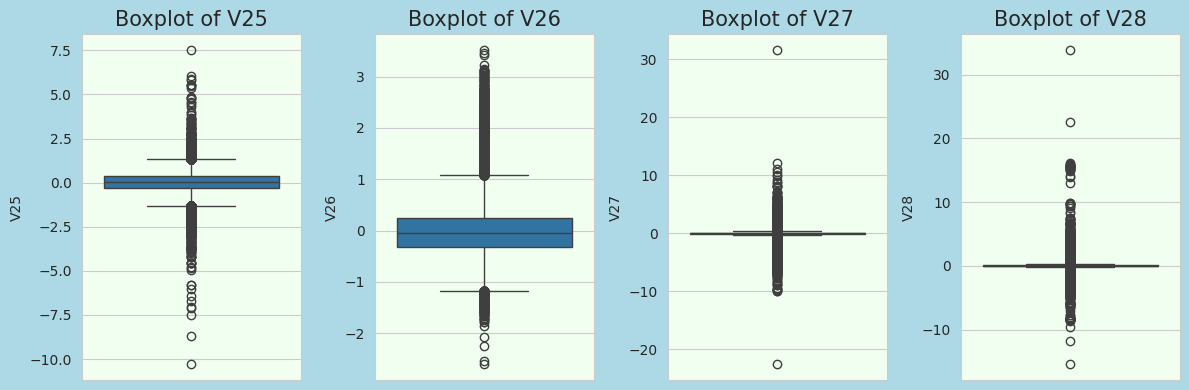

In [26]:
# V25 to V28
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i in range(4):
  sns.boxplot(data = df_new['V{}'.format(i+25)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+25), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

### Check Skewness and Handle Outliers (Imputation Method)

In [27]:
# skewness score
features = list(df_new.columns.values)
for column in features:
  print('{}: {}'.format(column, df_new[column].skew()))

Time: -0.03558064623598194
V1: -3.273271248440309
V2: -4.6951619005404694
V3: -2.1519839570997124
V4: 0.6715041706728241
V5: -2.414079246966253
V6: 1.829880383771521
V7: 2.890271192715498
V8: -8.310970330052545
V9: 0.5376630534496958
V10: 1.2529670787468168
V11: 0.34407419325686267
V12: -2.1990082816149954
V13: 0.06429340464018111
V14: -1.9188037137586451
V15: -0.3096590822936595
V16: -1.0511614715174662
V17: -3.690497194148406
V18: -0.24866145737243997
V19: 0.1083118109324772
V20: -2.0431210560273323
V21: 2.820033113572543
V22: -0.18232972797521269
V23: -5.867220791006341
V24: -0.5521292366718961
V25: -0.41574386205469593
V26: 0.5802923172348093
V27: -0.7538039138186547
V28: 11.555115084196773
Amount: 16.978803370060476
Class: 24.430545072372162
Hour: -0.03447736377040032
Amount_log: nan


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

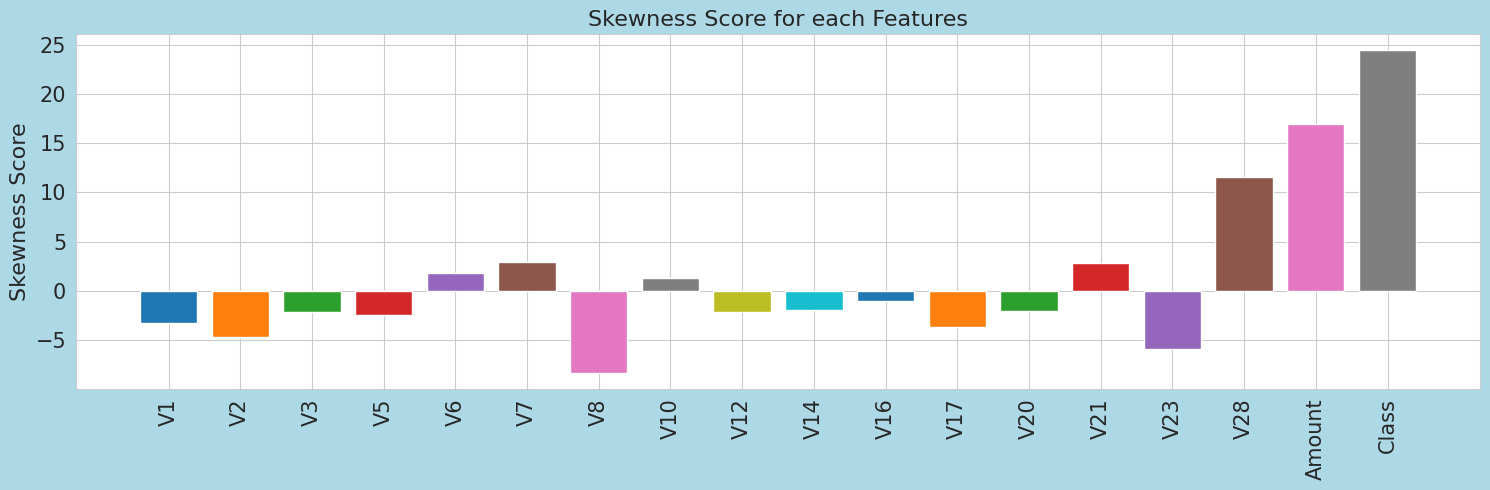

In [30]:
# Visualization of skewness score
skew_score = {}
for column in features:
  skew_score[column] = df_new[column].skew(axis = 0)

# filtered features
filter_feature = [feature for feature, score in skew_score.items() if score < -1 or score > 1]

fig, ax = plt.subplots(figsize = (15,5))

for i, col in enumerate(filter_feature):
  ax.bar([i,i], [0, skew_score[col]] , label = col)

ax.set_xticks(range(len(filter_feature)))
ax.set_xticklabels(filter_feature, rotation = 90)
ax.set_title('Skewness Score for each Features', fontsize = 16)
ax.set_ylabel('Skewness Score', fontsize = 16)
# ax.legend(loc = 'upper right', bbox_to_anchor = (1.2,1)

# adjust the fontsize of x and y axis
ax.tick_params(axis = 'x', labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)

fig.set_facecolor('#ADD8E6')
fig.tight_layout()
#plt.savefig('Skewness Score for each Features.png', dpi = 300)
#files.download('Skewness Score for each Features.png')
plt.show()

In [31]:
adfad

NameError: name 'adfad' is not defined

In [32]:
first_coef_skew = 3*(df_new['V8'].mean() - df_new['V8'].mode())/df_new['V8'].std()
first_coef_skew

,V8
0,0.405468
1,-1.853758


In [ ]:
# Create a function

def outlier_cols (data, feature):
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3 - q1

  lower_lim, upper_lim = q1 - 1.5*iqr, q3 + 1.5*iqr
  return lower_lim, upper_lim

for col in df_new.columns:
  print('Lower limit {}: upper limit {}'.format(col, outlier_cols(df_new, col)))


In [ ]:
# plot interquantile limit (IQR Method for Outlier Detection)
limits = {}

for col in df_new.columns:
  lower_limit, upper_limit = outlier_cols(df_new, col)
  limits[col] = [lower_limit, upper_limit]

del limits['Time']
del limits['Class']
del limits['Amount']

fig, ax = plt.subplots(figsize = (14,5))

for i, col in enumerate(limits):
  ax.plot([i,i], limits[col], marker = 'o', label = col)

ax.set_xticks(range(len(limits)))
ax.set_xticklabels(limits.keys(), rotation = 90)

ax.set_title('Interqunantile limit for each Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 17)
ax.set_ylabel('Limit', fontsize = 17)
# ax.legend(loc = 'upper right', bbox_to_anchor = (1.2,1))
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

In [ ]:
# calculate the number of outliers for each features (IQR Method)
outliers_count = {}
total_data_points = len(df_new)

for col in df_new.columns:
  lower,upper = outlier_cols(df_new, col)
  outliers = df_new[(df_new[col]<lower) | (df_new[col]>upper)]
  outliers_count[col] = (len(outliers)/total_data_points)*100

fig, ax = plt.subplots(figsize = (15,5))

filter_feature = [feature for feature, percentage in outliers_count.items() if percentage>2]

ax.bar(filter_feature, [outliers_count[feature] for feature in filter_feature])
ax.set_title('Number of Outliers for each Features', fontsize = 19)
ax.set_xlabel('Features', fontsize = 15)
ax.set_ylabel('Number of Outliers (%)', fontsize = 15)
fig.set_facecolor('#a6e4ff')
ax.set_xticklabels(outliers_count.keys(), rotation = 90, fontsize = 15)
ax.tick_params(axis = 'y', labelsize=15)
fig.tight_layout()
#plt.savefig('Number of Outliers for each Features.png', dpi = 300)
#files.download('Number of Outliers for each Features.png')
plt.show()

In [ ]:
# Hanlde the outlier by imputation method
def outl_imputation(data, features):
  data_ = data.copy()

  for col in data_.columns:

    lower, upper = outlier_cols(data, col)
    data_.loc[data_[col] < lower, col] = lower
    data_.loc[data_[col] > upper, col] = upper

  return data_

df2 = df_new.drop(['Class'], axis = 1)

clean_data = outl_imputation(df2, df2.columns)
clean_data.head()

### Visualization of V1 to V28 After Imputation

In [ ]:
# visualize by using boxplot
#

fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+1)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+1), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+5)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+5), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+9)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+9), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+13)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+13), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+17)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+17), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
# V18 - V21
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+21)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+21), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
# V22 - V25
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,5), sharey = True)

for i in range(4):
  sns.boxplot(data = clean_data['V{}'.format(i+25)], ax = axs[i])
  axs[i].set_title('Boxplot of V{}'.format(i+25), fontsize = 15)
  axs[i].set_facecolor('honeydew')

fig.set_facecolor('#a6e4ff')
fig.tight_layout()
plt.show()

In [ ]:
# Density plot after clean the outlier
clean_data['Class'] = df_new['Class']
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (14,6))

for i, ax in enumerate(axs):
  sns.kdeplot(data = clean_data[clean_data.Class == 0]['V{}'.format(i+1)], ax = ax, label = 'Normal')
  sns.kdeplot(data = clean_data[clean_data.Class == 1]['V{}'.format(i+1)], ax = ax, label = 'Fraud')
  ax.set_title('Density Plot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize = (12,6))
sns.kdeplot(data = clean_data[clean_data.Class == 0]['Amount'], label = 'Normal', ax = axs[0])
sns.kdeplot(data = clean_data[clean_data.Class == 1]['Amount'], label = 'Fraud', ax = axs[0])
sns.kdeplot(data = df[df.Class == 0]['Amount'], label = 'Normal', ax = axs[1])
sns.kdeplot(data = df[df.Class == 1]['Amount'], label = 'Fraud', ax = axs[1])
axs[0].set_title('After')
axs[0].set_facecolor('honeydew')
axs[1].set_title('Before')
axs[1].set_facecolor('honeydew')
plt.suptitle('Distribution Plot of Amount (Imputation)', fontsize = 15)
fig.tight_layout()
plt.legend()
fig.set_facecolor('#ADD8E6')
#plt.savefig('DensityPlot Amount Imputation.jpg')
#files.download('DensityPlot Amount Imputation.jpg')
plt.show()

## Outlier Experiment Using IsolationForest

In this experiment, we use Isolation Forest model. This model assembled by Liu et al. 2008 using the ensemble of tree algorithm to detect the anomaly in the dataset. The algorithm selects a random dimension (feature) and randomly split the data along that dimension. The different tree has different starting split.

In [ ]:
# import model and create new data
from sklearn.ensemble import IsolationForest
datacopy = df_new.copy()
datacopy.drop(['Class'], axis = 1, inplace = True)

In [ ]:
# IsolationForest Model
isolationforest = IsolationForest(n_estimators = 100, contamination = 0.1)
isolationforest.fit(datacopy)

In [ ]:
# Anomaly Score
score = isolationforest.decision_function(datacopy)
len(score)

In [ ]:
anomaly = isolationforest.predict(datacopy)
anomaly

In [ ]:
# create a column for score and anomaly
datacopy['score'] = score
datacopy['anomaly'] = anomaly
datacopy.head()

In [ ]:
# locate indexes with anomaly score -1
anomalies = datacopy.loc[datacopy['anomaly'] == -1]
anomalies.head()

In [ ]:
# drop anomalies
anomalies_list = list(anomalies.index)
isoforest_data = df_new.copy()
isoforest_data.drop(anomalies_list, axis = 0, inplace = True)
isoforest_data.head()

In [ ]:
# density plot after using IsolationForest (after drop anomalies)

fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (14,5))

for i, ax in enumerate(axs):
  sns.kdeplot(data = isoforest_data['V{}'.format(i+1)], ax = ax, label = 'Normal')
  ax.set_title('Density Plot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

plt.suptitle('Distribution Plot of V1 to V4 (After IsolationForest)', fontsize = 15)
fig.set_facecolor('#ADD8E6')
plt.legend()
fig.tight_layout()
#plt.savefig('Distribution Plot of V1 to V4 (After IsolationForest).png')
#files.download('Distribution Plot of V1 to V4 (After IsolationForest).png')
plt.show()

In [ ]:
# crete distribution plot before feature engineering process to compare the clean one
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (14,5))

for i, ax in enumerate(axs):
  sns.kdeplot(data = df[df.Class == 0]['V{}'.format(i+1)], ax = ax, label = 'Normal')
  ax.set_title('Density Plot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

plt.suptitle('Distribution Plot of V1 to V4 (Raw Data)', fontsize = 15)
fig.set_facecolor('#ADD8E6')
plt.legend()
fig.tight_layout()
#plt.savefig('Distribution Plot of V1 to V4 (No IsolationForest).png')
#files.download('Distribution Plot of V1 to V4 (No IsolationForest).png')
plt.show()

In [ ]:
# The Amount density plot before utilize isolation forest

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (12,4))

sns.kdeplot(data = df['Amount'], ax = axs[0])
axs[0].set_title('Raw Data', fontsize = 13)
axs[0].set_facecolor('honeydew')

# the Amount density plot after utilize isolation forest

sns.kdeplot(data = isoforest_data, x = 'Amount', ax = axs[1])
axs[1].set_title('Isolation Forest', fontsize = 13)
axs[1].set_facecolor('honeydew')

# the amount density plot after imputation
sns.kdeplot(data = clean_data, x = 'Amount', ax = axs[2])
axs[2].set_title('Imputation', fontsize = 13)
axs[2].set_facecolor('honeydew')

fig.suptitle('Distribution Plot of Amount', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.legend()
#plt.savefig('Amount Plot Dist.png')
#files.download('Amount Plot Dist.png')
plt.show()

In [ ]:
# The V1 Distribution Plot Comparation

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (14,5))

sns.kdeplot(data = df['V1'], ax = axs[0])
axs[0].set_title('Raw Data', fontsize = 13)
axs[0].set_facecolor('honeydew')

sns.kdeplot(data = isoforest_data, x = 'V1', ax = axs[1])
axs[1].set_title('Isolation Forest', fontsize = 13)
axs[1].set_facecolor('honeydew')

sns.kdeplot(data = clean_data, x = 'V1', ax = axs[2])
axs[2].set_title('Imputation', fontsize = 13)
axs[2].set_facecolor('honeydew')

fig.suptitle('Distribution Plot of V1', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.legend()

Note:

- **Raw Data**: The data records all amount of transaction, include the large one. However, when using the distribution plot, the total transaction mostly distributed less that 1000 for both normal and fraudulent type.

- **With Isolation Forest**: The plot shows transaction after using Isolation Forest method. The plot distributed between -100 and 250. This amount is smaller than before applying the algorithm. The graph shows how robusts the model from the skewness influence.

- **With InterQuantile**: The figure illustrates the distribution plot change after the process of outlier imputation. It means that the model is not robust to the skewness of the data.

*Conclusion*: The big number of transaction is an anomaly of the data. It will makes the machine leaning cannot accurately predict the fraud of transaction.

### Feature Selection Using IQR Imputation Data

In [ ]:
# Import decision tree model and random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(max_depth=3, random_state=1)
dt = DecisionTreeClassifier(max_depth=3, random_state=1)

X = clean_data.drop(['Class','Time'], axis = 1)
y = clean_data['Class']

rf.fit(X,y)
dt.fit(X,y)

rf_fi = pd.DataFrame(rf.feature_importances_, index = X.columns, columns = ['rf_importance']) # Random Forest + Imputation
dt_fi = pd.DataFrame(dt.feature_importances_, index = X.columns, columns = ['dt_importance']) # Decision Tree + Imputation

rf_fi = rf_fi.sort_values('rf_importance', ascending = False)
dt_fi = dt_fi.sort_values('dt_importance', ascending = False)

In [ ]:
# create a barplot to show feature importance score
fig = plt.figure(figsize = (8,5))

sns.barplot(x = 'rf_importance', y = rf_fi.index, data = rf_fi, label = 'Random Forest')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances (InterQuantile)')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

In [ ]:
# Decision Tree Importances Score
fig = plt.figure(figsize = (9,5))

sns.barplot(x = 'dt_importance', y = dt_fi.index, data = dt_fi, label = 'Decision Tree')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importances (InterQuantile)')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

The both plots illustrate that some features need to drop due to the score is low. We keep 5 of them like V10, V4, V17, V16, and Amount_log.

### Feature Selection Using IsolationForest Data

In [ ]:
# Create a Dataset after using Isolation Forest Method
X = isoforest_data.drop(['Class','Time','Amount_log'], axis = 1)
y = isoforest_data['Class']

rf_ = RandomForestClassifier(max_depth=3, random_state=1)
dt_ = DecisionTreeClassifier(max_depth=3, random_state=1)

rf_.fit(X,y)
dt_.fit(X,y)

rf_fi2 = pd.DataFrame(rf_.feature_importances_, index = X.columns, columns = ['rf_importance']) # Random Forest + Isolation Forest
dt_fi2 = pd.DataFrame(dt_.feature_importances_, index = X.columns, columns = ['dt_importance']) # Decision Tree + Isolation Forest

rf_fi2 = rf_fi2.sort_values('rf_importance', ascending = False)
dt_fi2 = dt_fi2.sort_values('dt_importance', ascending = False)

In [ ]:
# Create Random Forest Importances Barplot
fig = plt.figure(figsize = (9,5))

sns.barplot(data = rf_fi2, x = 'rf_importance', y = rf_fi2.index, label = 'Random Forest') # dataset Random Forest + Isolation Forest

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances (Isolation Forest)')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

In [ ]:
# Decision Tree Feature Importances
fig = plt.figure(figsize = (9,5))

sns.barplot(data = dt_fi2, x = 'dt_importance', y = dt_fi2.index, label = 'Decision Tree') # dataset Decision Tree + Isolation Forest

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importances (Isolation Forest)')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

### Feature Importances (with Log Transformation)

In [ ]:
'''
X = df_new.drop(['Class', 'Time','Amount'], axis = 1)
y = df_new['Class']

rf.fit(X,y)
dt.fit(X,y)

rf_fi = pd.DataFrame(rf.feature_importances_, index = X.columns, columns = ['rf_importance'])
dt_fi = pd.DataFrame(dt.feature_importances_, index = X.columns, columns = ['dt_importance'])

rf_fi = rf_fi.sort_values('rf_importance', ascending = False)
dt_fi = dt_fi.sort_values('dt_importance', ascending = False)
'''

### Filter Process

In [ ]:
# drop the feature with low feature importance score
# Using RANDOM FOREST + INTERQUANTILE dataset

low_fi = rf_fi[rf_fi['rf_importance'] < 0.05].index
df_ex = clean_data.drop(low_fi, axis = 1)
df_ex.head()

## Experiment (Random Forest Feature Importance + Imputation Dataset)

In [ ]:
# Import and Separation of Dataset
from sklearn.model_selection import train_test_split

X = df_ex.drop(['Class'], axis = 1)
y = df_ex['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
# Fit the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_model = RandomForestClassifier(max_depth=3, random_state=1)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=1)

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

### Test and Evaluation (Random Forest Feature Importances + Imputation Dataset & W/O Undersamping or Ovesampling)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_rf = rf_model.predict(X_test) # Random Forest
y_pred_dt = dt_model.predict(X_test) # Decision Tree

print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('Decision Tree')
print(classification_report(y_test, y_pred_dt))

In [ ]:
# Decision Tree Heatmap
fig, axs = plt.subplots(ncols=2, nrows=1 , figsize = (10,5), sharex = True, sharey = True)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot = True, fmt = 'd', ax = axs[1])
axs[0].set_title('Random Forest')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Truth')
axs[1].set_title('Decision Tree')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Truth')
fig.suptitle('Confusion Matrix Pure Data')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
#plt.savefig('rf dt conf mat (pure data).png')
#files.download('rf dt conf mat (pure data).png')
plt.show()

In [ ]:
# xgboost
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 100)

xgbmodel.fit(X_train, y_train)

y_pred_xgb = xgbmodel.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

## Experiment (With Oversampling and Undersampling)

In [ ]:
# import undesampling and oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampling = SMOTE()
undersampling = RandomUnderSampler()

# Train dataset oversampling and undersampling
X_train_over, y_train_over = oversampling.fit_resample(X_train, y_train)
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)

# Test dataset oversampling and undersamplng
X_test_over, y_test_over = oversampling.fit_resample(X_test, y_test)
X_test_under, y_test_under = undersampling.fit_resample(X_test, y_test)

print('Train dataset before oversampling')
print(y_train.value_counts())
print('Train dataset after oversampling')
print(y_train_over.value_counts())


In [ ]:
original = pd.DataFrame({'label': y_train, 'Type': 'Original'})
original_2 = pd.DataFrame({'label': y_test, 'Type': 'Original'})
oversampled = pd.DataFrame({'label': y_train_over, 'Type': 'Oversampled'})
combined_label = pd.concat([original, oversampled])

sns.countplot(oversampled, x = 'label', hue ='label')
plt.title('Oversampled Label')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.ylabel('Total', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.show()

In [ ]:
# Stacked barplot with combined_label dataset
# Assuming combined_label DataFrame exists from the previous code
# If not, you can create a sample for demonstration:
# original = pd.DataFrame({'label': [0]*100 + [1]*5, 'Type': 'Original'})
# oversampled = pd.DataFrame({'label': [0]*100 + [1]*100, 'Type': 'Oversampled'})
# combined_label = pd.concat([original, oversampled])

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=combined_label, x='Type', hue='label', ax=ax)

ax.set_title('Distribution of Labels by Dataset Type', fontsize=16)
ax.set_xlabel('Dataset Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(['Original', 'Oversampled'])
ax.legend(title='Class', labels=['Not Fraud', 'Fraud'])

plt.savefig('Stacked Barplot.png', dpi = 400)
files.download('Stacked Barplot.png')

plt.show()

In [ ]:
adfa

In [ ]:
# undersampling

print('Train dataset before undersampling')
print(y_train.value_counts())
print('Train dataset after undersampling')
print(y_train_under.value_counts())
#

In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=1)
dt = DecisionTreeClassifier(max_depth=3, random_state=1)

# using oversampling dataset
rf.fit(X_train_over, y_train_over)
dt.fit(X_train_over, y_train_over)

y_pred_rf_over = rf.predict(X_test_over) # Random Forest
y_pred_dt_over = dt.predict(X_test_over) # Decision Tree

print('Random Forest')
print(classification_report(y_test_over, y_pred_rf_over))
print('Decision Tree')
print(classification_report(y_test_over, y_pred_dt_over))

In [ ]:
# plot confusion matrix by using heatmap

fig, axs = plt.subplots(ncols=2, nrows=1 , figsize = (10,5), sharex = True, sharey = True)

sns.heatmap(confusion_matrix(y_test_over, y_pred_rf_over), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_over, y_pred_dt_over), annot = True, fmt = 'd', ax = axs[1])
axs[0].set_title('Random Forest')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Truth')
axs[1].set_title('Decision Tree')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Truth')
fig.suptitle('Confusion Matrix with Oversampling')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.savefig('Confusion Matrix (Oversampling).png')
files.download('Confusion Matrix (Oversampling).png')
plt.show()

In [ ]:
# accuracy
#rf_acc = accuracy_score(y_test_over, y_pred_rf_over)
#dt_acc = accuracy_score(y_test_over, y_pred_dt_over)

# plot the score
sns.barplot(y = [rf_acc, dt_acc], x = ['Random Forest', 'Decision Tree'])
plt.title('Accuracy Score')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

In [ ]:
# recall score
fig = plt.figure(facecolor = '#ADD8E6', figsize = (8,5))
rf_recall = recall_score(y_test_over, y_pred_rf_over)
dt_recall = recall_score(y_test_over, y_pred_dt_over)

# plot the recall score
sns.barplot(y = [rf_recall, dt_recall], x = ['Random Forest', 'Decision Tree'])
plt.title('Recall Score')
plt.xlabel('Recall')
plt.ylabel('Model')
plt.show()
#

## Hyperparemeter Tuning Process Using Oversampling Dataset

In [ ]:
from sklearn.model_selection import GridSearchCV

# define parameter for each model
rf_param_grid = {
    'n_estimators': [10,50],
    'max_depth':[1,3,5],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]
}


# Create models
rf = RandomForestClassifier(random_state = 1)
#dt = DecisionTreeClassifier(random_state = 2)

# Create GridSearchCv object for each models
rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')
#dt_grid_search = GridSearchCV(estimator = dt, param_grid = dt_param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Train the model
rf_grid_search.fit(X_train_over, y_train_over)
#dt_grid_search.fit(X_train_over, y_train_over)

# Get the best parameter and model
best_rf_params, best_rf_model = rf_grid_search.best_params_, rf_grid_search.best_estimator_
#best_dt_params, best_dt_model = dt_grid_search.best_params_, dt_grid_search.best_estimator_

print('Random Forest Best Parameter: ', best_rf_params)
print('--------------------------')
#print('Decision Tree Best Parameter: ', best_dt_params)


In [ ]:
# Test the random forest best parameter
y_pred_rf_best = best_rf_model.predict(X_test_over)

print(classification_report(y_test_over, y_pred_rf_best))

In [ ]:
# set the parameter for decision tree classifier
dt_param_grid = {
    'max_depth':[1,3,5],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]
}


# Finding best parameter for decision tree
dt_grid_search = GridSearchCV(estimator = dt, param_grid = dt_param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Train the model
dt_grid_search.fit(X_train_over, y_train_over)

# get the best parameter for Decision Tree
best_dt_params, best_dt_model = dt_grid_search.best_params_, dt_grid_search.best_estimator_

# Print the best parameter
print('Decision Tree Best Parameter: ', best_dt_params)

In [ ]:
# Test the decision Tree best parameter

y_pred_dt_best = best_dt_model.predict(X_test_over)

print(classification_report(y_test_over, y_pred_dt_best))

In [ ]:
# Create confusion matrix for both model with best parameter
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5), sharex = True, sharey = True)

sns.heatmap(confusion_matrix(y_test_over, y_pred_rf_best), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_over, y_pred_dt_best), annot = True, fmt = 'd', ax = axs[1])
axs[0].set_title('Random Forest Confusion Matrix (Best Parameter)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Truth')
axs[1].set_title('Decision Tree Confusion Matrix (Best Parameter)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Truth')
fig.suptitle('Confusion Matrix with Best Parameter')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.savefig('Confusion Matrix (Best Parameter).png')
files.download('Confusion Matrix (Best Parameter).png')
plt.show()

## Hyperparameter using Undersampling dataset

In [ ]:
# check undersampling dataset
print('Train dataset before undersampling')
print(y_train.value_counts())
print('Train dataset after undersampling')
print(y_train_under.value_counts())

In [ ]:
# create hyperparameter for the random forest model for undersampling dataset
from sklearn.model_selection import GridSearchCV

# define parameter for each model
rf_param_grid = {
    'n_estimators': [10,50],
    'max_depth':[1,3,5],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]
}


# Create models
rf = RandomForestClassifier(random_state = 1)
#dt = DecisionTreeClassifier(random_state = 2)

# Create GridSearchCv object for each models
rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')
#dt_grid_search = GridSearchCV(estimator = dt, param_grid = dt_param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Train the model
rf_grid_search.fit(X_train_under, y_train_under)
#dt_grid_search.fit(X_train_over, y_train_over)

# Get the best parameter and model
best_rf_params, best_rf_model = rf_grid_search.best_params_, rf_grid_search.best_estimator_
#best_dt_params, best_dt_model = dt_grid_search.best_params_, dt_grid_search.best_estimator_

print('Random Forest Best Parameter: ', best_rf_params)
print('--------------------------')
#print('Decision Tree Best Parameter: ', best_dt_params)


In [ ]:
# test the random forest model with undersampling dataset
y_pred_rf_best = best_rf_model.predict(X_test_under)

print(classification_report(y_test_under, y_pred_rf_best))

In [ ]:
# set the parameter for decision tree classifier
dt_param_grid = {
    'max_depth':[1,3,5],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]
}


# Finding best parameter for decision tree
dt_grid_search = GridSearchCV(estimator = dt, param_grid = dt_param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Train the model
dt_grid_search.fit(X_train_under, y_train_under)

# get the best parameter for Decision Tree
best_dt_params, best_dt_model = dt_grid_search.best_params_, dt_grid_search.best_estimator_

# Print the best parameter
print('Decision Tree Best Parameter: ', best_dt_params)

In [ ]:
# test the random forest model with undersampling dataset
y_pred_dt_best = best_dt_model.predict(X_test_under)

print(classification_report(y_test_under, y_pred_dt_best))

In [ ]:
# Create confusion matrix for both model with best parameter
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5), sharex = True, sharey = True)

sns.heatmap(confusion_matrix(y_test_under, y_pred_rf_best), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_under, y_pred_dt_best), annot = True, fmt = 'd', ax = axs[1])
axs[0].set_title('Random Forest Confusion Matrix (Best Parameter)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Truth')
axs[1].set_title('Decision Tree Confusion Matrix (Best Parameter)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Truth')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

## Try XGBClassifier as a machine learning model

In [ ]:
# import xgboost package

from xgboost import XGBClassifier

xgbmodel = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 100)

xgbmodel.fit(X_train_over, y_train_over)

y_pred_xgb = xgbmodel.predict(X_test_over)

print(classification_report(y_test_over, y_pred_xgb))

In [ ]:
sns.heatmap(confusion_matrix(y_test_over, y_pred_xgb), annot = True, fmt = 'd')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

 ## Ensemble and Cross Validation Method

In [ ]:
#!pip install scikit-learn==1.2.2
#!pip install --upgrade xgboost imblearn

In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = best_rf_model
model2 = best_dt_model
model3 = xgbmodel

ensemble_1 = VotingClassifier(estimators = [('rf', model1), ('dt', model2), ('xgb',model3 )], voting = 'hard')

ensemble_2 = VotingClassifier(estimators = [('rf', model1), ('dt', model2), ('xgb',model3 )], voting = 'soft')

ensemble_1.fit(X_train_over, y_train_over)

ensemble_2.fit(X_train_over, y_train_over)

y_pred_ensemble_1 = ensemble_1.predict(X_test_over)
y_pred_ensemble_2 = ensemble_2.predict(X_test_over)

print('Voting Classifier (hard)')
print(classification_report(y_test_over, y_pred_ensemble_1))
print("--------------")

print('Voting Classifier (soft)')
print(classification_report(y_test_over, y_pred_ensemble_2))
print("--------------")

In [ ]:
# Plot the result of Voting Classifier
fig, axs = plt.subplots(ncols= 2, nrows = 1, figsize = (10,5), sharex = True, sharey = True)
sns.heatmap(confusion_matrix(y_test_over, y_pred_ensemble_1), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_over, y_pred_ensemble_2), annot = True, fmt = 'd', ax = axs[1])
axs[0].set_title('Voting Classifier (hard)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Truth')
axs[1].set_title('Voting Classifier (soft)')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Truth')
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.show()

In [ ]:
# use cross validation
from sklearn.model_selection import cross_val_score
def cross_vals (model):
  scores = cross_val_score(model, X_train_over, y_train_over, cv = 5, scoring = 'accuracy')
  return scores.mean()

# apply the cross val score

randomforest = cross_vals(best_rf_model)
decisiontree = cross_vals(best_dt_model)
xgboost = cross_vals(xgbmodel)
ensemble = cross_vals(ensemble_2)

# create plot of each model
fig = plt.figure(figsize = (9,6), facecolor = '#ADD8E6')
sns.barplot(x = ['Random Forest', 'Decision Tree', 'XGBoost', 'Ensemble'], y = [randomforest, decisiontree, xgboost, ensemble])
plt.title('Cross Validation Score')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.savefig('Cross Val Score.png')
files.download('Cross Val Score.png')
plt.show()

In [ ]:
# Cross Validation Score with Stratified K Fold
from sklearn.model_selection import StratifiedKFold
def cross_vals_stratified (model):
  scores = cross_val_score(model, X_train_over, y_train_over, cv = StratifiedKFold(n_splits = 5), scoring = 'accuracy')
  return scores.mean()

# applied to the model

dt = cross_vals_stratified(best_dt_model)
rf = cross_vals_stratified(best_rf_model)
xgb = cross_vals_stratified(xgbmodel)
ensemble = cross_vals_stratified(ensemble_2)

# plot the result
fig = plt.figure(figsize = (9,6), facecolor = '#ADD8E6')
sns.barplot(x = ['Random Forest', 'Decision Tree', 'XGBoost', 'Ensemble'], y = [rf, dt, xgb, ensemble])
plt.title('Cross Validation Score (Stratified K Fold)')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.savefig('Cross Val Score (Stratified K Fold).png')
files.download('Cross Val Score (Stratified K Fold).png')
plt.show()

### ROC AUC Curve

In [ ]:
# import roc auc
fig = plt.figure(figsize = (8,5), facecolor='#ADD8E6')
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = best_rf_model.predict_proba(X_test_over)[:,1]
y_prob_dt = best_dt_model.predict_proba(X_test_over)[:,1]
y_prob_xgb = xgbmodel.predict_proba(X_test_over)[:,1]
y_prob_ensemble = ensemble_2.predict_proba(X_test_over)[:,1]

# calculate roc and auc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_over, y_prob_rf)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_over, y_prob_dt)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_over, y_prob_xgb)
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test_over, y_prob_ensemble)
auc_rf = roc_auc_score(y_test_over, y_prob_rf)
auc_dt = roc_auc_score(y_test_over, y_prob_dt)
auc_xgb = roc_auc_score(y_test_over, y_prob_xgb)
auc_ensemble = roc_auc_score(y_test_over, y_prob_ensemble)


# Plot ROC curve

plt.figure(figsize = (8,5))

sns.lineplot(x= fpr_rf, y = tpr_rf, label = 'Random Forest (AUC = %0.2f)' % auc_rf)
sns.lineplot(x = fpr_dt, y = tpr_dt, label = 'Decision Tree (AUC = %0.2f)' % auc_dt)
sns.lineplot(x = fpr_xgb, y = tpr_xgb, label = 'XGBoost (AUC = %0.2f)' % auc_xgb)
sns.lineplot(x = fpr_ensemble, y = tpr_ensemble, label = 'Ensemble (AUC = %0.2f)' % auc_ensemble)
sns.lineplot(x = [0,1], y = [0,1])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.savefig('ROC Curve.png')
files.download('ROC Curve.png')
plt.show()